In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#Load approved data
df_ap = pd.read_csv("ppp_applicants_ga_full.csv")
df_ap.head()

,name,amount,state,address,city,zip,naics_code,business_type,jobs_retained,date_approved,...,project_county_name,project_state,project_zip,originating_lender_city,originating_lender_state,loan_status_date,originating_lender_location_id,lmi_indicator,forgiveness_amount,forgiveness_date
0,LUMMUS CORPORATION,2000000.0,GA,225 Bourne Blvd,Savannah,31408-9586,333249.0,Corporation,294,2021-02-20,...,CHATHAM,GA,31408-9586,CHICAGO,IL,NaN,116998,N,NaN,NaN
1,COLIANT SOLUTIONS INC.,1294555.0,GA,2703 Brickton North Dr,Buford,30518-9101,541519.0,Corporation,63,2021-01-31,...,GWINNETT,GA,30518-9101,COLUMBUS,GA,NaN,19248,Y,NaN,NaN
2,YOHE PLUMBING INC,729509.0,GA,1120 Franke Court N/A,Augusta,30909,238220.0,Corporation,105,2021-03-12,...,RICHMOND,GA,30909,PHOENIXVILLE,PA,NaN,121536,N,NaN,NaN
3,LEWIS COLOR LITHOGRAPHERS INC,571193.4,GA,30 Joe Kennedy Blvd,Statesboro,30458-3417,323111.0,Corporation,49,2021-02-02,...,BULLOCH,GA,30458-3417,COLUMBUS,GA,NaN,19248,N,NaN,NaN
4,"ALMA PAK INTERNATIONAL, LLC",472700.0,GA,230 PINEVIEW RD,ALMA,31510-4326,445230.0,Partnership,37,2020-04-10,...,BACON,GA,31510-4326,ALMA,GA,2021-01-08,17811,N,475877.59,2020-12-15


In [3]:
#Check data infomation
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553828 entries, 0 to 553827
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            553827 non-null  object 
 1   amount                          553828 non-null  float64
 2   state                           553828 non-null  object 
 3   address                         553827 non-null  object 
 4   city                            553828 non-null  object 
 5   zip                             553828 non-null  object 
 6   naics_code                      551488 non-null  float64
 7   business_type                   553787 non-null  object 
 8   jobs_retained                   553828 non-null  int64  
 9   date_approved                   553828 non-null  object 
 10  lender                          553828 non-null  object 
 11  congressional_district          553823 non-null  object 
 12  loan_number     

In [45]:
#Load removed data
df_rm = pd.read_excel("ppp-removed-ga.xlsx")
df_rm.head()

,name,amount,state,address,city,zip,naics_code,business_type,jobs_retained,date_approved,...,project_county_name,project_state,project_zip,originating_lender_city,originating_lender_state,loan_status_date,originating_lender_location_id,lmi_indicator,forgiveness_amount,forgiveness_date
0,TRIPLE C CUSTOM CONCRETE LLC,43655.0,GA,106 Lisa Street East Dublin GA,East Dublin,31027,238990,Limited Liability Company(LLC),7,2021-05-11,...,LAURENS,GA,31027,Saint Petersburg,FL,2021-05-11,123499,Y,NaN,NaN
1,DAVIS LAWN CARE SERVICES,35000.0,GA,752 Savannah Ave N/A,Waynesboro,30830-1156,112910,Partnership,2,2021-05-12,...,BURKE,GA,30830-1156,ARLINGTON,MA,2021-05-12,262380,N,NaN,NaN
2,LONNIE RATLIFF,28949.0,GA,55 Maple St NW Apt 802,Atlanta,30314-4760,531390,Single Member LLC,5,2021-04-16,...,FULTON,GA,30314-4760,PHOENIXVILLE,PA,2021-04-16,121536,Y,NaN,NaN
3,DENARD TRIMBLE,20833.0,GA,727 Chapman St,Jonesboro,30238-5681,812111,Sole Proprietorship,1,2021-05-22,...,FAYETTE,GA,30238-5681,Brea,CA,2021-05-22,514546,Y,NaN,NaN
4,DANA VINES,20833.0,GA,3548 Tracey Dr,Duluth,30096-3861,311999,Sole Proprietorship,1,2021-03-20,...,GWINNETT,GA,30096-3861,Miami,FL,2021-03-20,529192,N,NaN,NaN


In [5]:
#Check data infomation
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836 entries, 0 to 25835
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            25836 non-null  object        
 1   amount                          25836 non-null  float64       
 2   state                           25836 non-null  object        
 3   address                         25836 non-null  object        
 4   city                            25836 non-null  object        
 5   zip                             25836 non-null  object        
 6   naics_code                      25836 non-null  int64         
 7   business_type                   25836 non-null  object        
 8   jobs_retained                   25836 non-null  int64         
 9   date_approved                   25836 non-null  datetime64[ns]
 10  lender                          25836 non-null  object        
 11  co

In [6]:
#How many distinct values for each feature in approved data
for col in df_ap.columns:
    print(col, df_ap[col].nunique())

name 444162
amount 106476
state 1
address 429791
city 2762
zip 229592
naics_code 1086
business_type 23
jobs_retained 462
date_approved 237
lender 1194
congressional_district 38
loan_number 553828
sba_office_code 19
processing_method 2
loan_status 3
term 21
sba_guaranty_percentage 1
initial_approval_amount 105931
current_approval_amount 106476
undisbursed_amount 110
servicing_lender_location_id 1243
servicing_lender_name 1184
servicing_lender_address 1232
servicing_lender_city 857
servicing_lender_state 53
servicing_lender_zip 1239
rural_urban_indicator 2
hubzone_indicator 2
business_age_description 5
project_city 2777
project_county_name 171
project_state 10
project_zip 229694
originating_lender_city 861
originating_lender_state 53
loan_status_date 355
originating_lender_location_id 1254
lmi_indicator 2
forgiveness_amount 269653
forgiveness_date 270


In [7]:
#How many distinct values for each feature in removed data
for col in df_rm.columns:
    print(col, df_rm[col].nunique())

name 25272
amount 6319
state 1
address 24743
city 670
zip 22287
naics_code 699
business_type 17
jobs_retained 48
date_approved 165
lender 89
congressional_district 14
loan_number 25836
sba_office_code 1
processing_method 2
loan_status 2
term 2
sba_guaranty_percentage 1
initial_approval_amount 6303
current_approval_amount 6319
undisbursed_amount 6023
servicing_lender_location_id 89
servicing_lender_name 89
servicing_lender_address 89
servicing_lender_city 80
servicing_lender_state 24
servicing_lender_zip 88
rural_urban_indicator 2
hubzone_indicator 2
business_age_description 3
project_city 670
project_county_name 159
project_state 1
project_zip 22337
originating_lender_city 80
originating_lender_state 24
loan_status_date 163
originating_lender_location_id 89
lmi_indicator 2
forgiveness_amount 0
forgiveness_date 0


Data Cleansing

In [46]:
#Features to remove from analysis
col_drop = ["name", "state", "address", "zip", "loan_number", "sba_guaranty_percentage", "project_zip",
            "servicing_lender_address", "servicing_lender_zip", "loan_status", "undisbursed_amount",
           "loan_status_date", "forgiveness_amount", "forgiveness_date", "servicing_lender_city", "originating_lender_city",
           "city", "project_city"]
df_ap.drop(col_drop, axis=1, inplace=True)
df_rm.drop(col_drop, axis=1, inplace=True)

In [47]:
#Imputation for missing values
df_ap.naics_code.fillna(0, inplace=True)
df_ap.business_type.fillna("No", inplace=True)
df_ap.congressional_district.fillna("No", inplace=True)
df_ap.project_county_name.fillna("No", inplace=True)

In [48]:
#Imputation for 2 rows that job retained is 0
df_ap[df_ap.jobs_retained==0]["jobs_retained"]
df_ap.loc[55332, "jobs_retained"] = 1
df_ap.loc[518543, "jobs_retained"] = 1

In [49]:
#Put unique indicator for each dataset
df_ap["is_removed"] = 0
df_rm["is_removed"] = 1
#Convert naics_code & date to correct data type
df_ap.naics_code = df_ap.naics_code.astype(int, copy=False)
df_rm.date_approved = df_rm.date_approved.astype(str, copy=False)
#Combined two datasets
df = pd.concat([df_ap, df_rm])

Feature Engineering

In [12]:
#Date imputer
def date_imputer(date):
    if "2020-04-01" <= date < "2020-05-01":
        return "2020-04"
    elif "2020-05-01" <= date < "2020-06-01":
        return "2020-05"
    elif "2020-06-01" <= date < "2020-07-01":
        return "2020-06"
    elif "2020-07-01" <= date < "2020-08-01":
        return "2020-07"
    elif "2020-08-01" <= date < "2020-09-01":
        return "2020-08"
    elif "2020-09-01" <= date < "2020-10-01":
        return "2020-09"
    elif "2020-10-01" <= date < "2020-11-01":
        return "2020-10"
    elif "2020-11-01" <= date < "2020-12-01":
        return "2020-11"
    elif "2020-12-01" <= date < "2021-01-01":
        return "2020-12"
    elif "2021-01-01" <= date < "2021-02-01":
        return "2021-01"
    elif "2021-02-01" <= date < "2021-03-01":
        return "2021-02"
    elif "2021-03-01" <= date < "2021-04-01":
        return "2021-03"
    elif "2021-04-01" <= date < "2021-05-01":
        return "2021-04"
    elif "2021-05-01" <= date < "2021-06-01":
        return "2021-05"
    elif "2021-06-01" <= date < "2021-07-01":
        return "2021-06"

In [13]:
#Naics_code imputer
def code_imputer(code):
    if code == "11":
        return "Agriculture, forestry, fishing and hunting"
    elif code == "21":
        return "Mining, quarrying, and oil and gas extraction"
    elif code == "22":
        return "Utilities"
    elif code == "23":
        return "Construction"
    elif code == "31" or code == "33" or code == "32":
        return "Manufacturing"
    elif code == "42":
        return "Wholesale trade"
    elif code == "44" or code == "45":
        return "Retail trade"
    elif code == "48" or code == "49":
        return "Transportation and warehousing"
    elif code == "51":
        return "Information"
    elif code == "52":
        return "Finance and insurance"
    elif code == "53":
        return "Real estate and rental and leasing"
    elif code == "54":
        return "Professional, scientific, and technical"
    elif code == "55":
        return "Management of companies and enterprises"
    elif code == "56":
        return "Administrative and support and waste"
    elif code == "61":
        return "Educational services"
    elif code == "62":
        return "Health care and social assistance"
    elif code == "71":
        return "Arts, entertainment, and recreation"
    elif code == "72":
        return "Accommodation and food services"
    elif code == "81":
        return "Other services (except public administration)"
    elif code == "99":
        return "Industries not classified"
    elif code == "92":
        return "Public Administration"
    else:
        return "No naics code"

In [14]:
#Convert naics code to industry
df.naics_code = df.naics_code.astype(str, copy=False)
df.naics_code = df.naics_code.apply(lambda code:code[:2])
df["industry"] = df.naics_code.apply(code_imputer)
df.drop("naics_code", axis=1, inplace=True)
#Convert two locations to an indicator which indicates different or not  
df["lender_loc_consistency"] = (df.servicing_lender_location_id == df.originating_lender_location_id)
df.lender_loc_consistency = df.lender_loc_consistency.astype(str, copy=False)
df.drop(["servicing_lender_location_id", "originating_lender_location_id"], axis=1, inplace=True)
#Convert date to year-month format
df.date_approved = df.date_approved.apply(date_imputer)
#Convert sba_code & term to appropriate format
df.sba_office_code = df.sba_office_code.astype(str, copy=False)
df.term = df.term.astype(str, copy=False)
#Add three indicators comparing amount, lender name, lender state
df["lender_state_consistency"] = (df.servicing_lender_state == df.originating_lender_state)
df.lender_state_consistency = df.lender_state_consistency.astype(str, copy=False)
df["lender_name_consistency"] = (df.servicing_lender_name == df.lender)
df.lender_name_consistency = df.lender_name_consistency.astype(str, copy=False)
df["amount_consistency"] = (df.initial_approval_amount == df.current_approval_amount)
df.amount_consistency = df.amount_consistency.astype(str, copy=False)

In [15]:
#Add additional salary data for analysis
df_salary = pd.read_excel("GA_salary.xlsx", sheet_name=1)

In [16]:
#Join two datasets
df = pd.merge(left=df, right=df_salary, left_on=("congressional_district", "industry"),
                    right_on=("116 Congressional District", "Industry"), how="left")
df.drop(["116 Congressional District", "Industry"], axis=1, inplace=True)

In [17]:
#Add new feature average amount, indicating average amount applied for per job retained
df["average_amount"] = df.amount/df.jobs_retained

In [18]:
#Add new feature higher than average, indicating wheather the average amount is greater than industry average
df["higher_than_average"] = (df.average_amount > df.average_salary)
df.higher_than_average = df.higher_than_average.astype(str, copy=False)

Exploratory Data Analysis

In [19]:
#Get categorical & numerical column names
s = (df.dtypes == "object")
cat_cols = list(s[s].index)
num_cols = list(df.drop(cat_cols, axis=1).drop("is_removed", axis=1).columns)

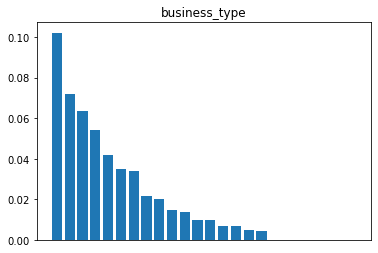

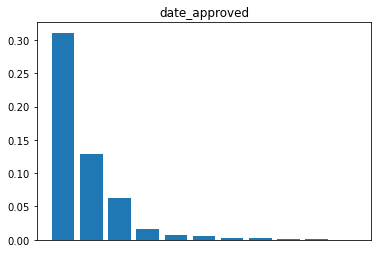

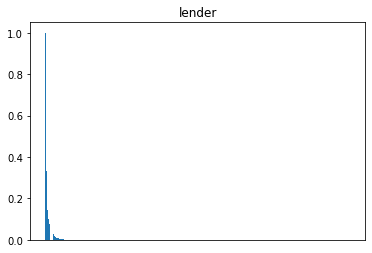

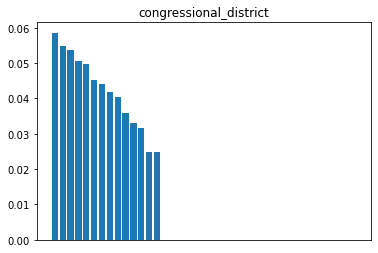

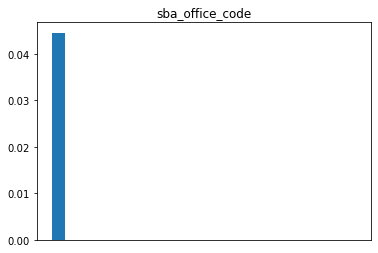

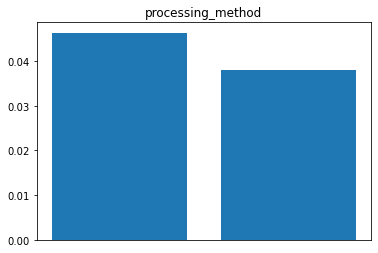

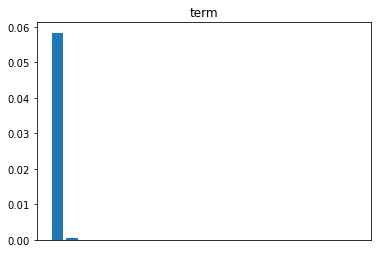

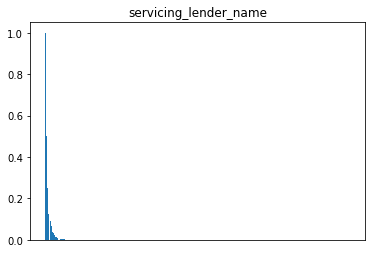

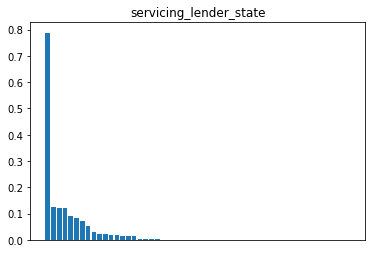

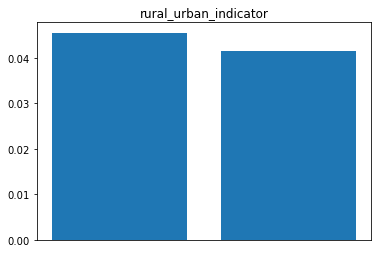

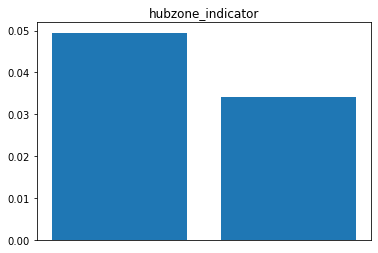

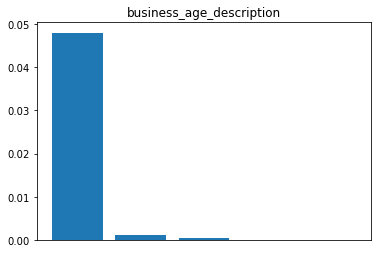

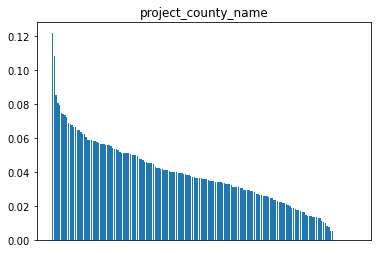

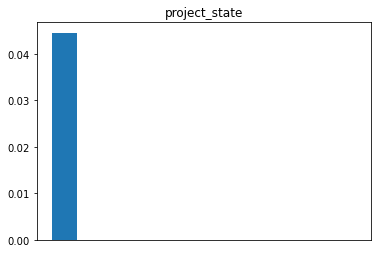

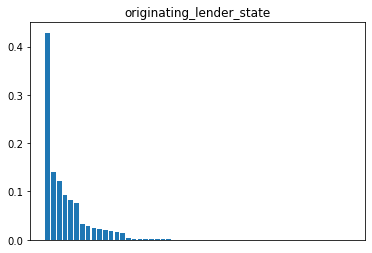

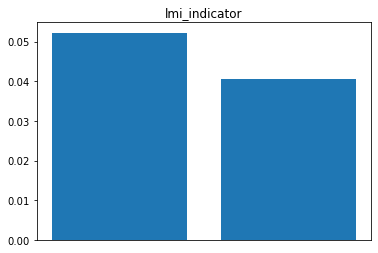

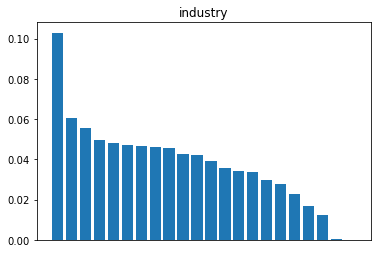

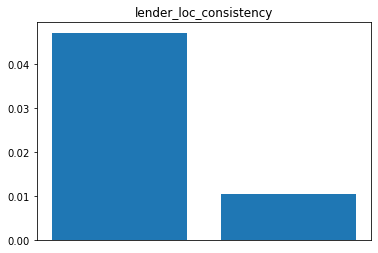

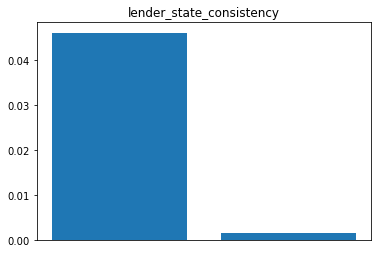

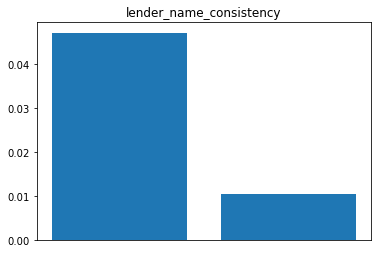

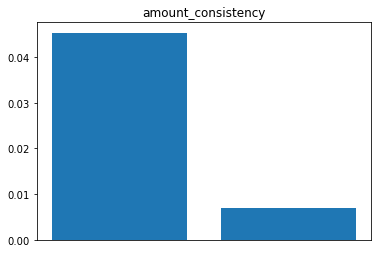

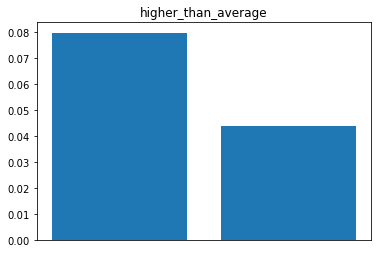

In [20]:
#Check if each categorical feature is relevant to the removal of application
for f in cat_cols:
    value = df.groupby(f).mean()["is_removed"].sort_values(ascending=False)
    index = value.index
    plt.bar(index, value)
    plt.title("%s" % f)
    plt.xticks([])
    plt.show()

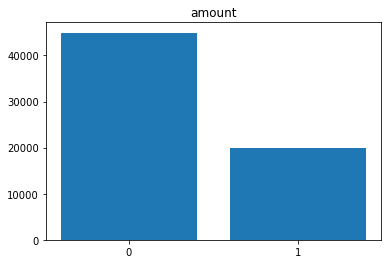

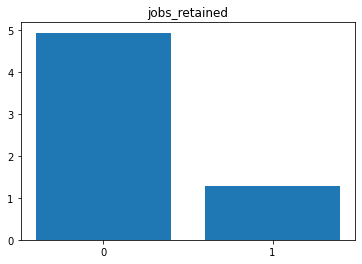

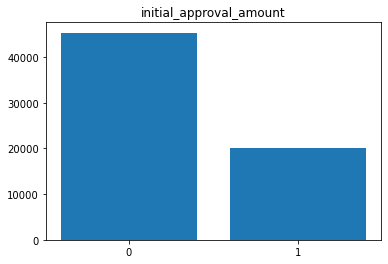

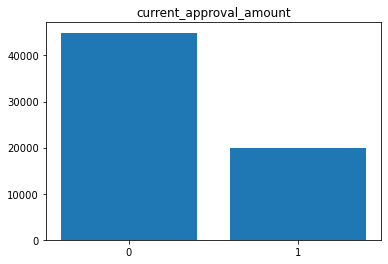

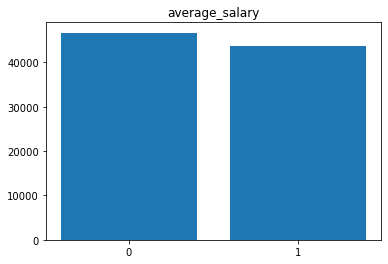

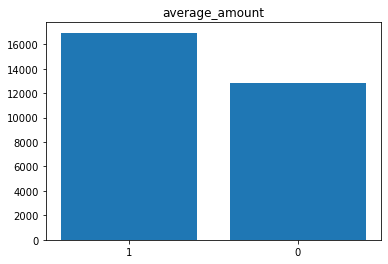

In [21]:
#Check if each numerical feature is relevant to the removal of application
df.is_removed = df.is_removed.astype(str, copy=False)
for f in num_cols:
    value = df.groupby("is_removed").mean()[f].sort_values(ascending=False)
    index = value.index
    plt.bar(index, value)
    plt.title("%s" % f)
    plt.show()

Explanatory Data Analysis (Using Tableau)

In [22]:
#Save cleaned data for Taleau use
#df.to_csv("ppp_cleaned.csv", index=False)

Prepare data for predictive model

In [23]:
#Check feature infomation
for col in df.columns:
    print(col, df[col].nunique(), df[col].dtypes)

amount 106992 float64
business_type 24 object
jobs_retained 462 int64
date_approved 11 object
lender 1196 object
congressional_district 39 object
sba_office_code 19 object
processing_method 2 object
term 21 object
initial_approval_amount 106434 float64
current_approval_amount 106992 float64
servicing_lender_name 1186 object
servicing_lender_state 53 object
rural_urban_indicator 2 object
hubzone_indicator 2 object
business_age_description 5 object
project_county_name 172 object
project_state 10 object
originating_lender_state 53 object
lmi_indicator 2 object
is_removed 2 object
industry 22 object
lender_loc_consistency 2 object
lender_state_consistency 2 object
lender_name_consistency 2 object
amount_consistency 2 object
average_salary 279 float64
average_amount 125445 float64
higher_than_average 2 object


In [24]:
#Prepare data for predictive model
#Drop features that are not available when application happens
#df.drop("date_approved", axis=1, inplace=True)
df.drop("lender", axis=1, inplace=True)
df.drop("servicing_lender_name", axis=1, inplace=True)
df.drop("servicing_lender_state", axis=1, inplace=True)
df.drop("current_approval_amount", axis=1, inplace=True)
df.drop("originating_lender_state", axis=1, inplace=True)
#df.drop("lender_loc_consistency", axis=1, inplace=True)
#df.drop("lender_state_consistency", axis=1, inplace=True)
#df.drop("lender_name_consistency", axis=1, inplace=True)
#df.drop("amount_consistency", axis=1, inplace=True)
df.drop("sba_office_code", axis=1, inplace=True)
#df.drop("processing_method", axis=1, inplace=True)
#df.drop("term", axis=1, inplace=True)
df.drop("initial_approval_amount", axis=1, inplace=True)
#Drop features can be represent by other features
#df.drop("project_county_name", axis=1, inplace=True)
df.drop("project_state", axis=1, inplace=True)

In [25]:
#Remove non-goergia congressional district & No
galist = ['GA-01', 'GA-07', 'GA-12', 'GA-05', 'GA-06', 'GA-02', 'GA-14',
          'GA-09', 'GA-11', 'GA-08', 'GA-13', 'GA-03', 'GA-04', 'GA-10']
def remove(cd):
    if cd not in galist:
        return "No"
    else:
        return cd
df["congressional_district"] = df["congressional_district"].apply(remove)
df.drop(df[df['congressional_district'] == "No"].index, inplace = True)

In [26]:
#Remove some rows that do not have average salary 
#Because from our analysis average salary vs average amount is a key indicator
df.drop(df[df.average_salary.isna()].index, inplace=True)
#Create feature representing amount vs salary difference
df["salary_difference"] = df["average_amount"]-df["average_salary"]
df.drop("average_amount", axis=1, inplace=True)
df.drop("average_salary", axis=1, inplace=True)
df.drop("higher_than_average", axis=1, inplace=True)

In [27]:
#Replace appropriate name for business type 
df.business_type.unique()
def b_imputer(t):
    if t == "501(c)6 – Non Profit Membership":
        return "Non Profit Membership 501c6"
    elif t == "501(c)3 – Non Profit":
        return "Non Profit 501c3"
    elif t == "501(c)19 – Non Profit Veterans":
        return "Non Profit Veterans 501c19"
    else:
        return t
df["business_type"] = df["business_type"].apply(b_imputer)

In [28]:
#Convert is_removed to appropriate data type
df["is_removed"] = df.is_removed.astype(int, copy=False)

In [29]:
#How many data for each class
df.is_removed.value_counts()

0    549808
1     25751
Name: is_removed, dtype: int64

In [30]:
#Date approved
df.date_approved.value_counts().sort_index()

2020-04     85065
2020-05     45865
2020-06     18216
2020-07     10878
2020-08      5303
2021-01     19682
2021-02     47215
2021-03     76609
2021-04    158022
2021-05    108467
2021-06       237
Name: date_approved, dtype: int64

In [31]:
def date_imputer2(d):
    if d == "2020-04":
        return 1
    elif d == "2020-05":
        return 2
    elif d == "2020-06":
        return 3
    elif d == "2020-07":
        return 4
    elif d == "2020-08":
        return 5
    elif d == "2021-01":
        return 6
    elif d == "2021-02":
        return 7
    elif d == "2021-03":
        return 8
    elif d == "2021-04":
        return 9
    elif d == "2021-05":
        return 10
    elif d == "2021-06":
        return 11

In [32]:
#Convert date approved
df["date_approved"] = df.date_approved.apply(date_imputer2)

In [33]:
#Term
df.term.value_counts()

60    439881
24    133697
59      1766
6         81
23        36
5         28
8         16
7         16
9         12
44         7
45         6
55         3
53         2
58         2
47         1
48         1
43         1
57         1
22         1
52         1
Name: term, dtype: int64

In [34]:
#Drop extreme rare terms
df.drop(df[(df['term'] != "60") & (df['term'] != "24") & (df['term'] != "59")].index, inplace=True)

In [35]:
#Business type
df.business_type.value_counts()

Sole Proprietorship                    236896
Limited  Liability Company(LLC)        100264
Corporation                             70022
Independent Contractors                 62277
Self-Employed Individuals               60678
Subchapter S Corporation                27007
Non-Profit Organization                  6210
Single Member LLC                        5906
Partnership                              2323
Limited Liability Partnership            1596
Professional Association                 1191
Non Profit 501c3                          340
Cooperative                               148
Non Profit Membership 501c6               137
Non-Profit Childcare Center               100
Joint Venture                              91
Qualified Joint-Venture (spouses)          50
No                                         37
Trust                                      30
Employee Stock Ownership Plan(ESOP)        23
Tenant in Common                           14
Rollover as Business Start-Ups (RO

In [36]:
#Drop extreme rare business type
df.drop(df[(df['business_type'] == "No") | (df['business_type'] == "Rollover as Business Start-Ups (ROB")
           | (df['business_type'] == "Non Profit Veterans 501c19") | (df['business_type'] == "Housing Co-op")
          ].index, inplace=True)

In [37]:
#Save cleaned data for predictive model use
#df.to_csv("ppp_model2.csv", index=False)

Predictive Model (Using R)